In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt


import xgboost as xgb

In [3]:
# uploading dataset

df = pd.read_csv("final_dataset_clusters_agglo.csv")
df

,country,updated_country,Country Code (ISO 3166-1 alpha-3),Year,gold,silver,bronze,total,medal_sum,check,...,BMI_obesity,BMI_morbid_obesity,Mean_Height,Diabetes_in_18+,Diabetes_treated_in_30+,non-HDL_cholesterol,HDL_cholesterol,Raised_blood_pressure,Hypertension,cluster
0,Afghanistan,Afghanistan,AFG,2000,0,0,0,0,0,True,...,0.037869,0.002605,159.842420,0.124577,0.227280,3.129567,1.128193,0.285826,0.360907,0
1,Afghanistan,Afghanistan,AFG,2004,0,0,0,0,0,True,...,0.053626,0.003623,160.101298,0.139517,0.230020,3.140379,1.120109,0.294444,0.367908,0
2,Afghanistan,Afghanistan,AFG,2008,0,0,1,1,1,True,...,0.072227,0.004871,160.345587,0.156097,0.231910,3.139214,1.110600,0.299683,0.375714,0
3,Afghanistan,Afghanistan,AFG,2012,0,0,1,1,1,True,...,0.095673,0.006511,160.547954,0.175056,0.233189,3.127356,1.098825,0.302909,0.383675,0
4,Algeria,Algeria,DZA,2000,1,1,3,5,5,True,...,0.131282,0.006170,164.568663,0.120538,0.384386,3.656587,1.040695,0.303167,0.375078,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,Vietnam,Vietnam,VNM,2012,0,0,0,0,0,True,...,0.007485,0.000263,160.226437,0.053830,0.308850,3.282843,1.100474,0.230051,0.287047,0
416,Zimbabwe,Zimbabwe,ZWE,2000,0,0,0,0,0,True,...,0.064462,0.004432,164.167920,0.097955,0.193180,2.811148,1.281791,0.295197,0.393215,0
417,Zimbabwe,Zimbabwe,ZWE,2004,1,1,1,3,3,True,...,0.072780,0.005343,164.048476,0.107090,0.198996,2.841984,1.288866,0.291489,0.407746,0
418,Zimbabwe,Zimbabwe,ZWE,2008,1,3,0,4,4,True,...,0.082211,0.006385,164.040913,0.110433,0.204597,2.856043,1.290640,0.287677,0.421400,0


In [4]:
# weighted medal counts
# bronze = 1
# silver = 3
# gold = 5

df["weighted_medal_count"] = df["bronze"] * 1 + df["silver"] * 3 + df["gold"] * 5
df

,country,updated_country,Country Code (ISO 3166-1 alpha-3),Year,gold,silver,bronze,total,medal_sum,check,...,BMI_morbid_obesity,Mean_Height,Diabetes_in_18+,Diabetes_treated_in_30+,non-HDL_cholesterol,HDL_cholesterol,Raised_blood_pressure,Hypertension,cluster,weighted_medal_count
0,Afghanistan,Afghanistan,AFG,2000,0,0,0,0,0,True,...,0.002605,159.842420,0.124577,0.227280,3.129567,1.128193,0.285826,0.360907,0,0
1,Afghanistan,Afghanistan,AFG,2004,0,0,0,0,0,True,...,0.003623,160.101298,0.139517,0.230020,3.140379,1.120109,0.294444,0.367908,0,0
2,Afghanistan,Afghanistan,AFG,2008,0,0,1,1,1,True,...,0.004871,160.345587,0.156097,0.231910,3.139214,1.110600,0.299683,0.375714,0,1
3,Afghanistan,Afghanistan,AFG,2012,0,0,1,1,1,True,...,0.006511,160.547954,0.175056,0.233189,3.127356,1.098825,0.302909,0.383675,0,1
4,Algeria,Algeria,DZA,2000,1,1,3,5,5,True,...,0.006170,164.568663,0.120538,0.384386,3.656587,1.040695,0.303167,0.375078,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,Vietnam,Vietnam,VNM,2012,0,0,0,0,0,True,...,0.000263,160.226437,0.053830,0.308850,3.282843,1.100474,0.230051,0.287047,0,0
416,Zimbabwe,Zimbabwe,ZWE,2000,0,0,0,0,0,True,...,0.004432,164.167920,0.097955,0.193180,2.811148,1.281791,0.295197,0.393215,0,0
417,Zimbabwe,Zimbabwe,ZWE,2004,1,1,1,3,3,True,...,0.005343,164.048476,0.107090,0.198996,2.841984,1.288866,0.291489,0.407746,0,9
418,Zimbabwe,Zimbabwe,ZWE,2008,1,3,0,4,4,True,...,0.006385,164.040913,0.110433,0.204597,2.856043,1.290640,0.287677,0.421400,0,14


In [5]:
# selecting nessesary features 

features = [
    "GDP", "HDI", "LE", "EYS", "MYS", "GNIPC", "MMR", "PHDI", "CO2_PROD",
    
    "BMI_underweight", "BMI_obesity", "BMI_morbid_obesity",
    "Mean_Height", "Diabetes_in_18+", "Diabetes_treated_in_30+",
    "non-HDL_cholesterol", "HDL_cholesterol", "Raised_blood_pressure",
    "Hypertension", 
    
    "cluster", #"Year"
]

X = df[features]

In [6]:
# target variable

y = df["weighted_medal_count"]

In [7]:
# scaling

#scaler = StandardScaler()
#scaler = RobustScaler()
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)



In [8]:
# XGBoost - WITHOUT CV

# train test split
random_state = 1
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=random_state)

# setting up the model 
model = xgb.XGBRegressor(random_state=random_state)

# fitting model to train set
model.fit(X_train, y_train)

# predicting on test set
y_pred = model.predict(X_test)

# metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("XGBoost without CV :")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.3f}")

XGBoost without CV :
RMSE: 53.46
R2: 0.729


In [9]:
# XGBoost - WITH CV k = 3

# CV
kf = KFold(n_splits=3, shuffle=True, random_state=random_state)
scoring = {"rmse": "neg_root_mean_squared_error", "r2": "r2"}

cv_results = cross_validate(model, X_scaled, y, cv=kf, scoring=scoring, return_train_score=False)

# metrics
mean_rmse = -np.mean(cv_results['test_rmse'])
std_rmse = np.std(cv_results['test_rmse'])
mean_r2 = np.mean(cv_results['test_r2'])
std_r2 = np.std(cv_results['test_r2'])

print("XGBoost with 3-Fold CV:")
print(f"Average RMSE: {mean_rmse:.2f} (± {std_rmse:.2f})")
print(f"Average R2: {mean_r2:.3f} (± {std_r2:.3f})")



# XGBoost - WITH CV k = 5 

# CV
kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
scoring = {"rmse": "neg_root_mean_squared_error", "r2": "r2"}

cv_results = cross_validate(model, X_scaled, y, cv=kf, scoring=scoring, return_train_score=False)

# metrics
mean_rmse = -np.mean(cv_results['test_rmse'])
std_rmse = np.std(cv_results['test_rmse'])
mean_r2 = np.mean(cv_results['test_r2'])
std_r2 = np.std(cv_results['test_r2'])

print("\nXGBoost with 5-Fold CV:")
print(f"Average RMSE: {mean_rmse:.2f} (± {std_rmse:.2f})")
print(f"Average R2: {mean_r2:.3f} (± {std_r2:.3f})")



# XGBoost - WITH CV k = 10 

# CV
kf = KFold(n_splits=10, shuffle=True, random_state=random_state)
scoring = {"rmse": "neg_root_mean_squared_error", "r2": "r2"}

cv_results = cross_validate(model, X_scaled, y, cv=kf, scoring=scoring, return_train_score=False)

# metrics
mean_rmse = -np.mean(cv_results['test_rmse'])
std_rmse = np.std(cv_results['test_rmse'])
mean_r2 = np.mean(cv_results['test_r2'])
std_r2 = np.std(cv_results['test_r2'])

print("\nXGBoost with 10-Fold CV:")
print(f"Average RMSE: {mean_rmse:.2f} (± {std_rmse:.2f})")
print(f"Average R2: {mean_r2:.3f} (± {std_r2:.3f})")

XGBoost with 3-Fold CV:
Average RMSE: 105.24 (± 15.73)
Average R2: 0.287 (± 0.264)

XGBoost with 5-Fold CV:
Average RMSE: 88.45 (± 30.59)
Average R2: 0.430 (± 0.338)

XGBoost with 10-Fold CV:
Average RMSE: 94.83 (± 41.43)
Average R2: 0.244 (± 0.571)


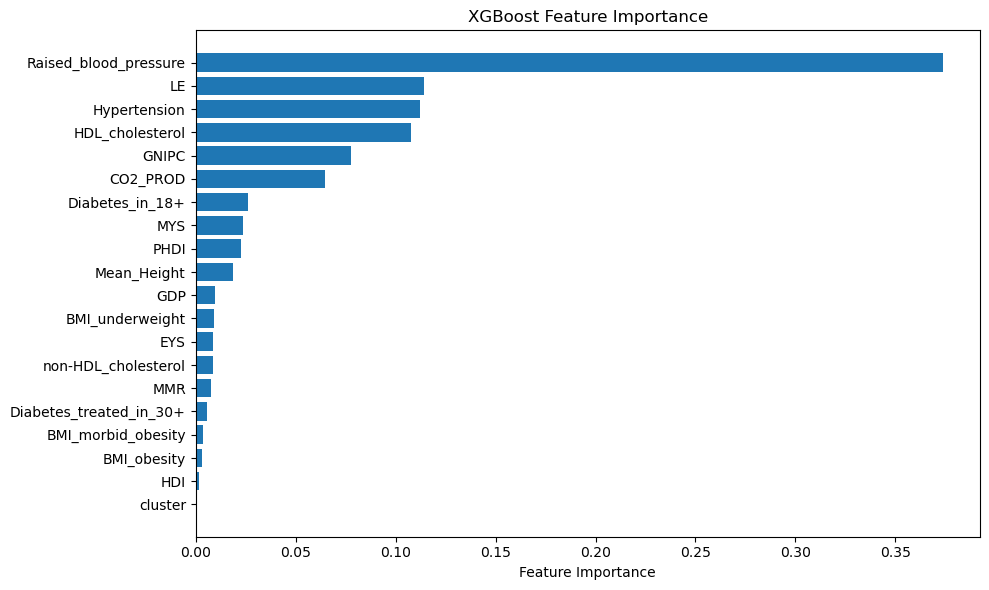

In [10]:
importances = model.feature_importances_

# making a df
fi_df = pd.DataFrame({"feature": features, "importance": importances}).sort_values(by="importance", ascending=False)

# plotting
plt.figure(figsize=(10, 6))
plt.barh(fi_df["feature"], fi_df["importance"])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
# remove US and see how the model imrpvoes. if it imrpvoes signignifcanyl then u can tabl about it 